<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/deep_learning/examples/cnn_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original notebook: Probabilistic Machine Learning, Kevin Murphy

[Original Github repo](https://www.github.com/probml)



### CNN on MNIST using Tensorflow 2.0

In [11]:
# standard python libraries
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
import PIL
try:
  import imageio
except ModuleNotFoundError:
  %pip install -qq imageio
  import imageio
from IPython import display
import sklearn


In [4]:
%%capture
try:
  import probml_utils.mnist_helper_tf as helper
except ModuleNotFoundError:
  %pip install -qq git+https://github.com/probml/probml-utils.git
  import probml_utils.mnist_helper_tf as helper

In [5]:
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
  IS_COLAB = True
except Exception:
  IS_COLAB = False

# Tensorlow >= 2.0 is required
try:
  import tensorflow as tf
except ModuleNotFoundError:
  %pip install -qq tensorflow
  import tensorflow as tf

from tensorflow import keras

assert tf.__version__ >= '2.0'


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


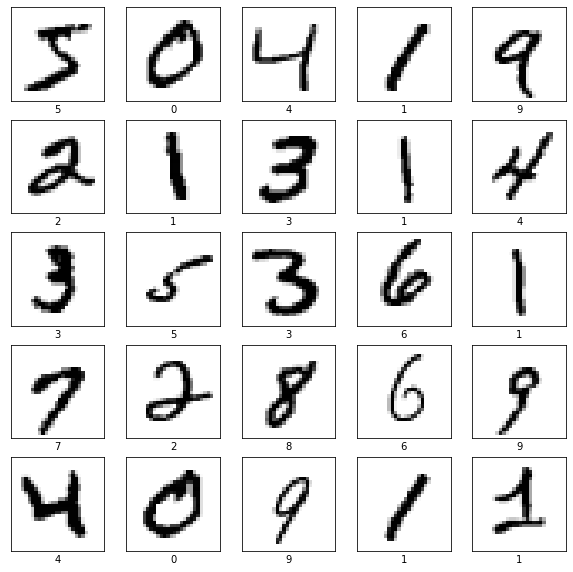

In [6]:
train_images, train_labels, test_images, test_labels, class_names = helper.get_dataset(FASHION=False)
print(train_images.shape)
helper.plot_dataset(train_images, train_labels, class_names)

In [8]:
from tensorflow.keras import datasets, layers, models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28,28,1))

epoch 0
1875/1875 [==============================] - 72s 37ms/step - loss: 0.1441 - accuracy: 0.9555
time spent training 85.066
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0449 - accuracy: 0.9867
Train accuracy: 0.9866999983787537
313/313 [==============================] - 4s 12ms/step - loss: 0.0441 - accuracy: 0.9869
Test accuracy: 0.9868999719619751
313/313 [==============================] - 4s 12ms/step
(131,)


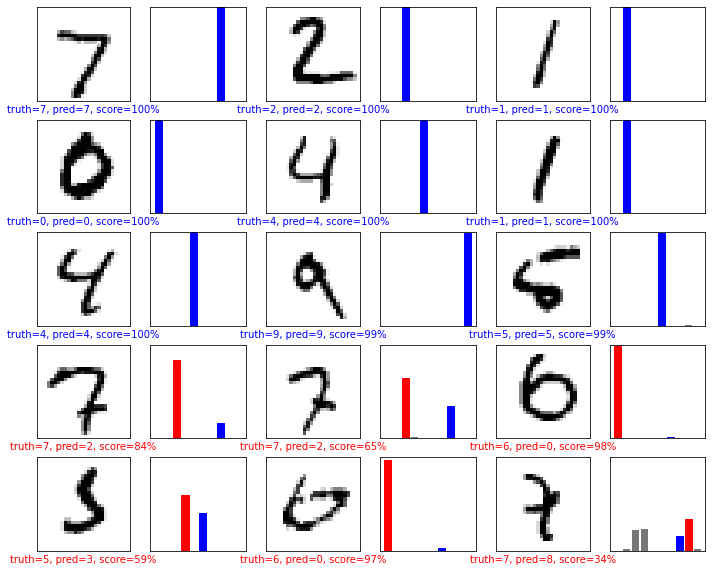

epoch 1
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0459 - accuracy: 0.9858
time spent training 82.041
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0366 - accuracy: 0.9876
Train accuracy: 0.987583339214325
313/313 [==============================] - 4s 12ms/step - loss: 0.0456 - accuracy: 0.9852
Test accuracy: 0.9851999878883362
313/313 [==============================] - 4s 14ms/step


<Figure size 432x288 with 0 Axes>

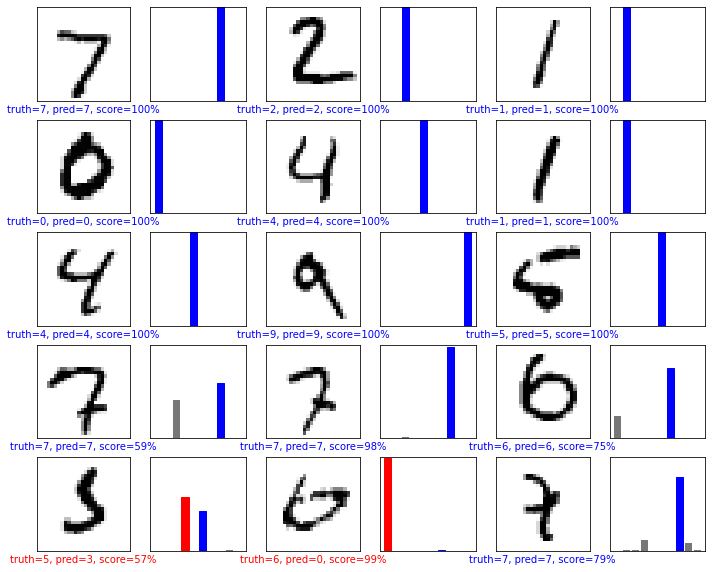

<Figure size 432x288 with 0 Axes>

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

for epoch in range(2):
  print(f'epoch {epoch}')
  time_start = time()
  model.fit(train_images, train_labels, epochs=1)
  print(f"time spent training {time() - time_start:.3f}")

  train_loss, train_acc = model.evaluate(train_images, train_labels)
  print(f"Train accuracy: {train_acc}")
  
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print(f"Test accuracy: {test_acc}")

  predictions = model.predict(test_images)
  if epoch == 0:
    ndx = helper.find_interesting_test_images(predictions, test_labels)
  helper.plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)
  plt.suptitle(f"epoch {epoch}")